In [1]:
from sklearn.decomposition import TruncatedSVD
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
 
from adjustText import adjust_text

In [2]:
plt.rcParams.update({
    'font.family': 'Times New Roman',
    'savefig.dpi': 300,
    'figure.dpi': 300,
    'font.weight': 'bold',
    'axes.labelweight': 'bold'
})

In [3]:
def visualize_latent_factors(V, ids, titles, method_name, plot_title):
    
    points = V[ids, :]
    
    # plt.figure(figsize=(12, 10))
    fig, ax = plt.subplots(figsize=(5, 3))
    
    ax.scatter(points[:, 0], points[:, 1], s=100, alpha=0.7)
    
    texts = []
    for i, (x, y) in enumerate(points):
        short_title = titles[ids[i]][:25] + '...' if len(titles[ids[i]]) > 25 else titles[ids[i]]
        texts.append(ax.text(x, y, short_title, ha='center', va='center', weight=400))
        # ax.text(x[i], y[i], 'Text%s' %i, ha='center', va='center') for i in range(len(x))
        # plt.annotate(short_title, (x, y), fontsize=9, xytext=(5, 5), textcoords='offset points')
    adjust_text(texts, arrowprops={'arrowstyle': '-', 'color': 'black'})
    
    plt.title(plot_title)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.grid(True, linestyle='--', alpha=0.7)
    # plt.xlim(0, 2)
    # plt.ylim(-2, 2)
    
    
    filename = f"{method_name}_{plot_title.replace(' ', '_').lower()}.png"
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()

In [4]:
train_df = pd.read_csv('../data/train.csv')
test_df = pd.read_csv('../data/test.csv')
movies_df = pd.read_csv('../data/movies.csv', encoding='latin-1')

movie_titles = {int(row['Movie ID']) - 1: row['Movie Title'] for _, row in movies_df.iterrows()}


any10 = list(range(10))

popularity = train_df.groupby('Movie ID').size()
most_popular = (popularity.sort_values(ascending=False).head(10).index - 1).tolist()

avg_ratings = train_df.groupby('Movie ID')['Rating'].mean()
best_movies = (avg_ratings.sort_values(ascending=False).head(10).index - 1).tolist()

genres = ["Horror", "Comedy", "Childrens"]
genre_movies = {}
for genre in genres:
    subset = movies_df[movies_df[genre] == 1]
    indices = (subset['Movie ID'] - 1).head(10).tolist()
    print(indices)
    genre_movies[genre] = indices

[16, 83, 100, 122, 182, 183, 184, 199, 200, 207]
[0, 3, 7, 12, 15, 16, 20, 24, 25, 28]
[0, 7, 34, 62, 70, 77, 90, 93, 94, 98]


In [5]:
print(any10)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [6]:
# V = np.load("scratch_bias.npy")
V = np.load("sklearn-nmf.npy")
print(V.shape)
svd = TruncatedSVD(n_components=2, n_iter=20)
V = svd.fit_transform(V)
print(V.shape)

(1683, 20)
(1683, 2)


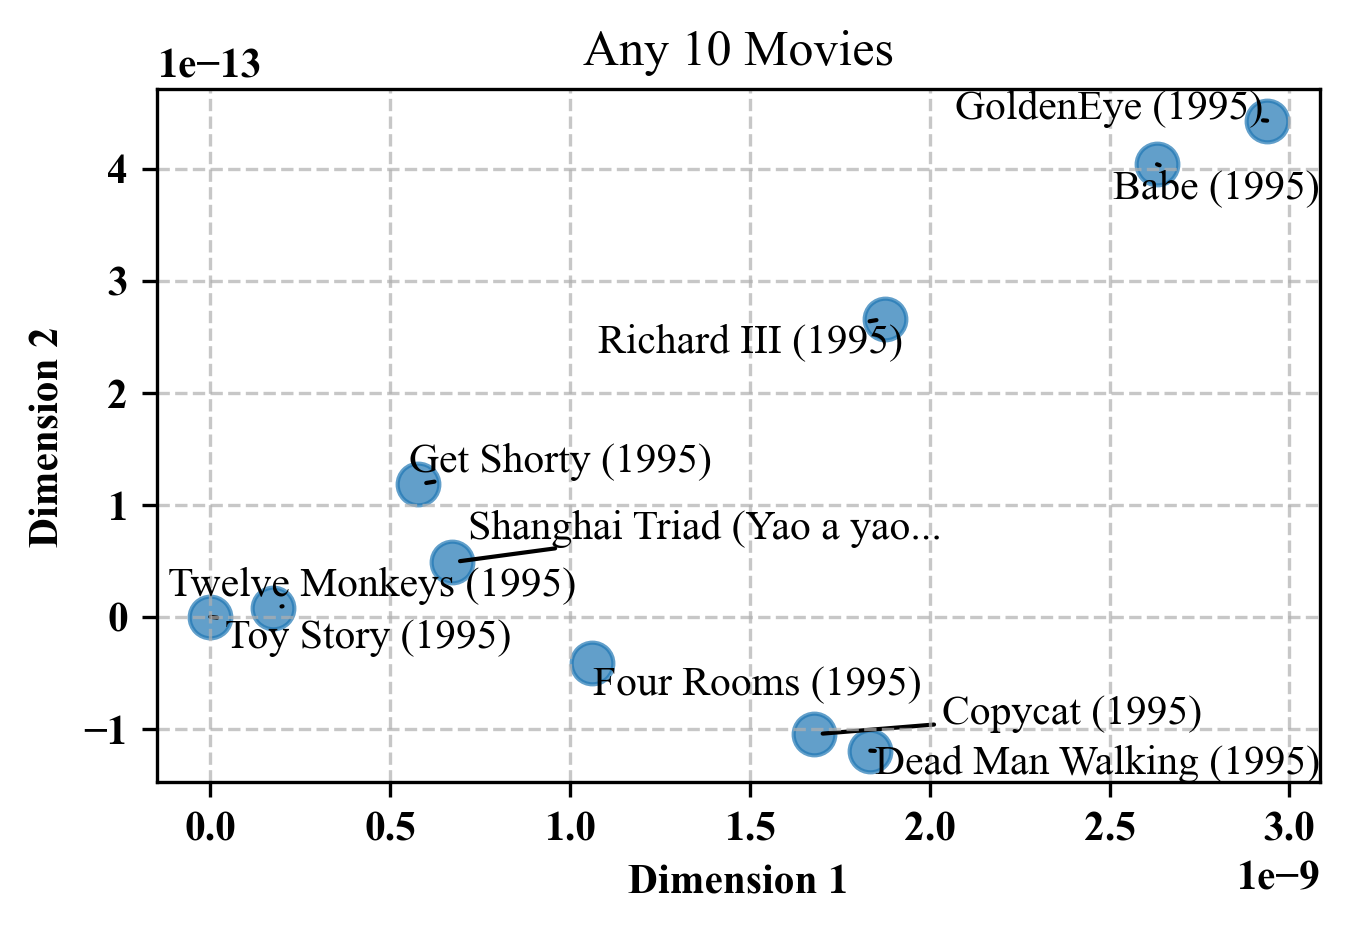

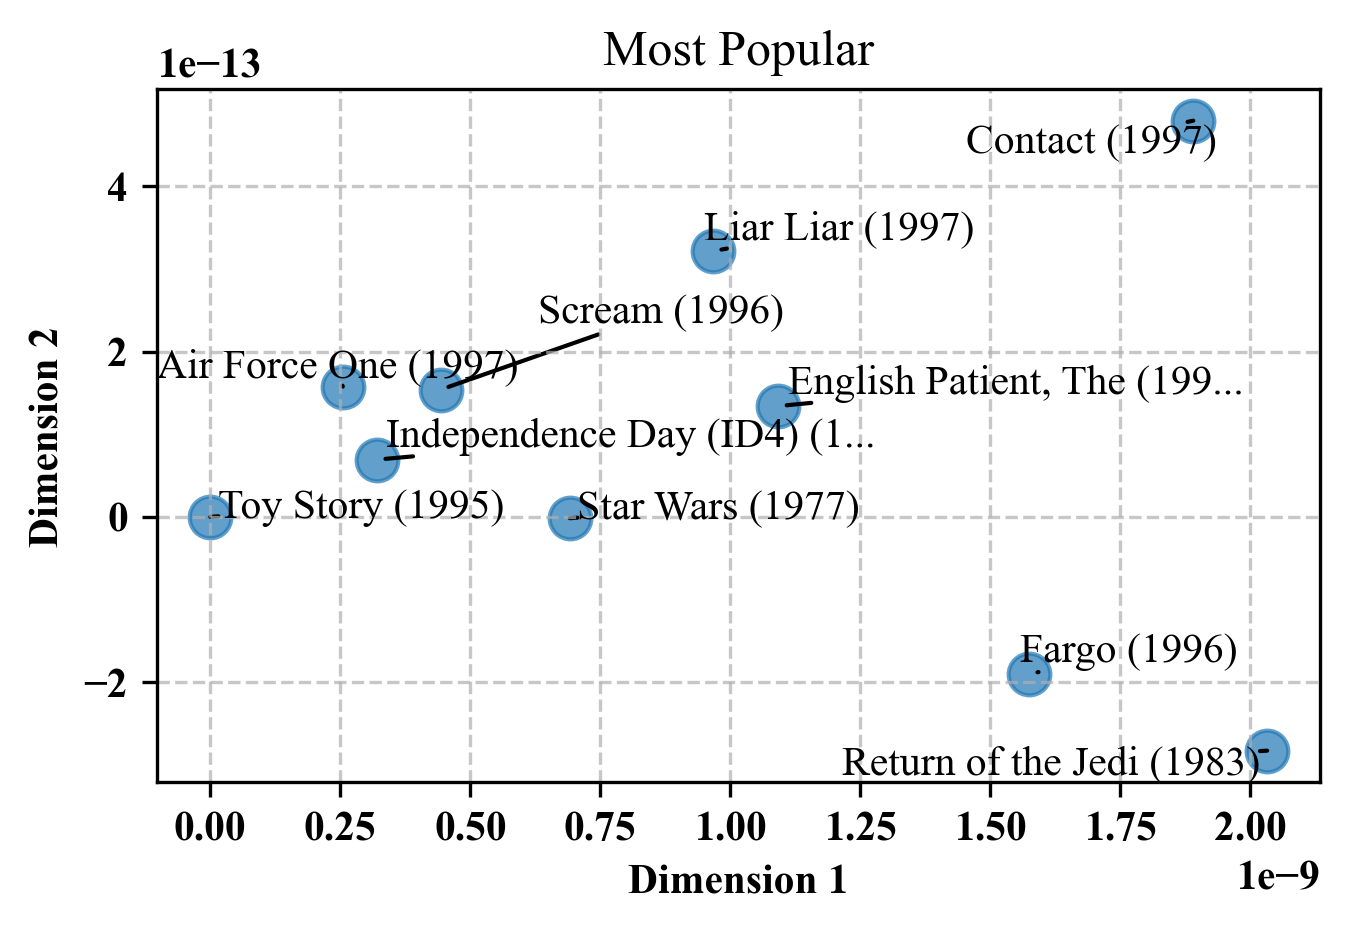

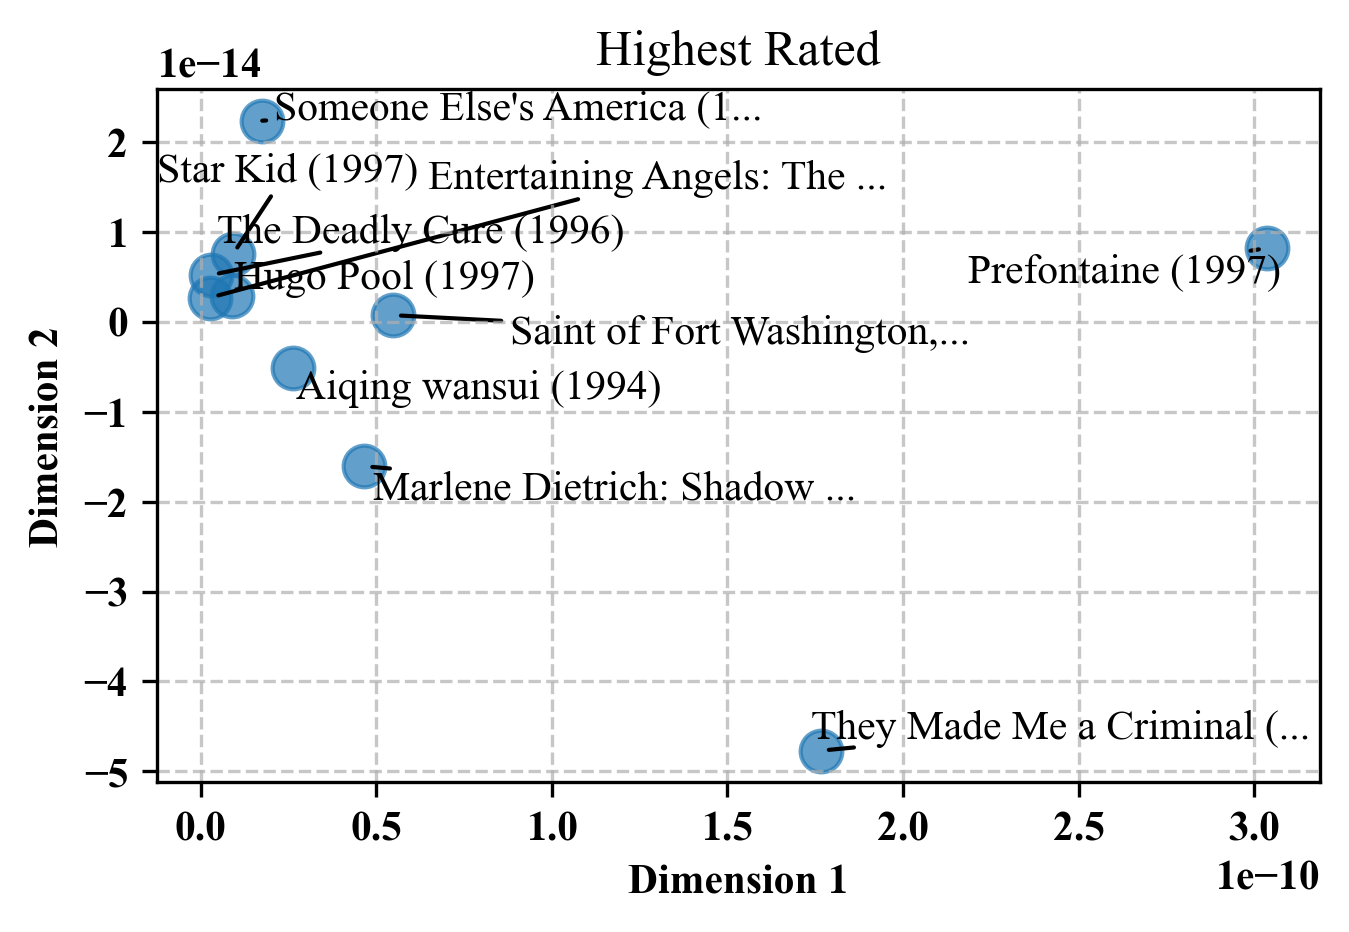

In [7]:
charts_params = {
    'Any 10 Movies': any10,
    'Most Popular': most_popular,
    'Highest Rated': best_movies,
}
for title, ids in charts_params.items():
    visualize_latent_factors(V, ids, movie_titles, "from_scratch", title)

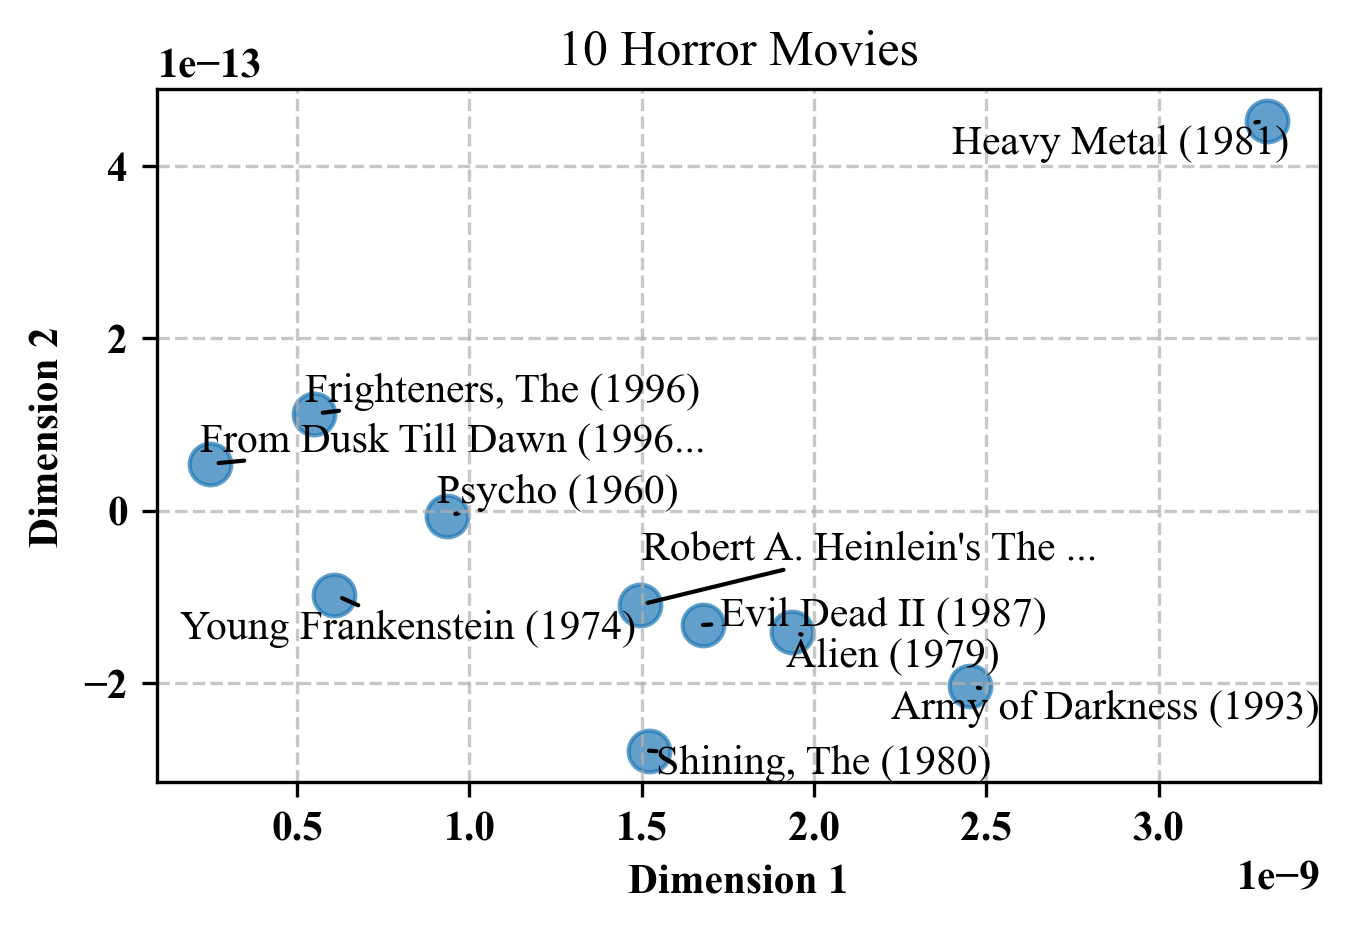

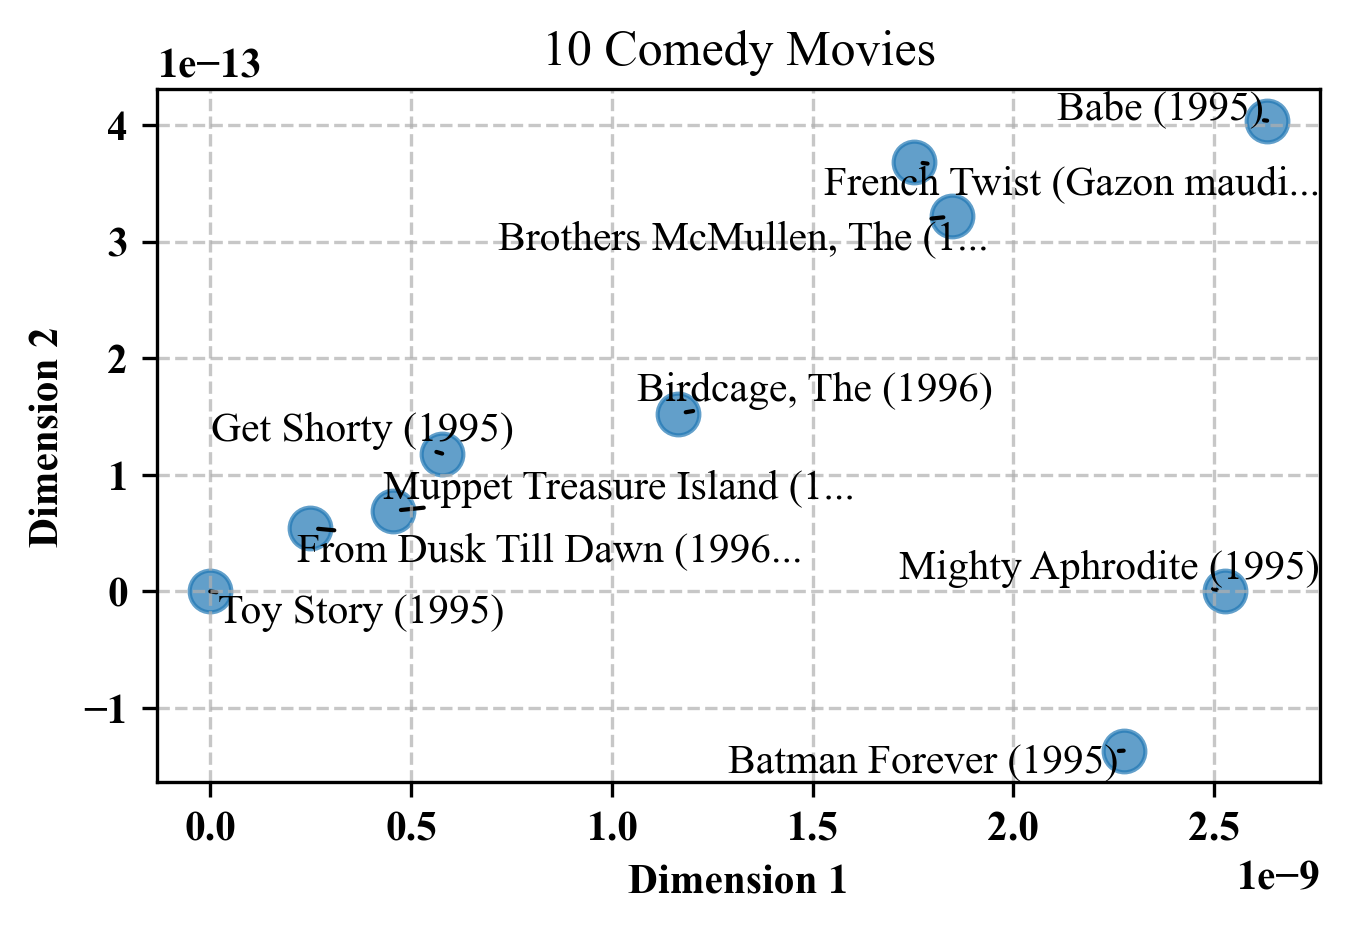

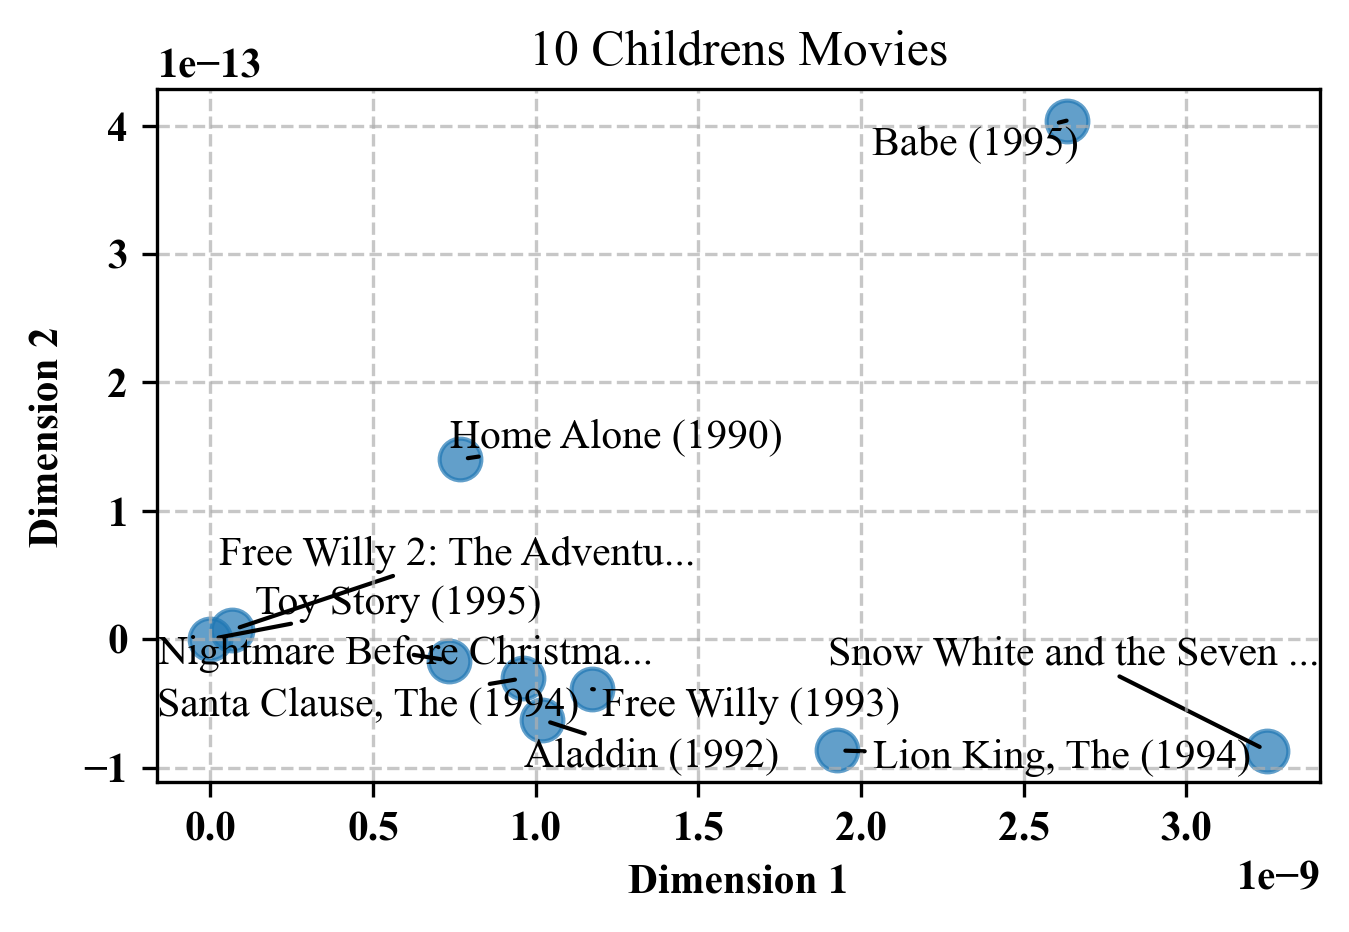

In [8]:
for genre in genres:
    visualize_latent_factors(V, genre_movies[genre], movie_titles, "from_scratch", f"10 {genre} Movies")